### Загадка магической шляпы

Осталось всего неделя до первого сентября, и распределяющая шляпа куда-то пропала! После битвы за Хогвартс многие книги из архива сгорели, в том числе "Учет студентов", из-за чего распределение становится еще сложнее. Составив небольшой список, учителя собираются воспользоваться им, но не знают как, поэтому обратились к маглам, попросив их создать СППР. Новая магическая шляпа будет лишь считывать некоторый набор данных с ученика, которые будут передаваться в СППР, после чего директор школы должен будет выбрать, к какому факультету отнести ученика.

Для начала разработчики решили посмотреть, что за данные им передали маги, и сколько всего записей.

In [5]:
import pandas as pd

df = pd.read_csv('Characters.csv',sep=';',index_col="Id")

df

,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death
Id,,,,,,,,,,,,,,
1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,Black,Bright green,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...,31 July 1980,NaN
2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,Red,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping,1 March 1980,NaN
3,Hermione Jean Granger,Female,Student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,Human,Muggle-born,Brown,Brown,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything,"19 September, 1979",NaN
4,Albus Percival Wulfric Brian Dumbledore,Male,Headmaster,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,Human,Half-blood,Silver| formerly auburn,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...,Late August 1881,"30 June, 1997"
5,Rubeus Hagrid,Male,Keeper of Keys and Grounds | Professor of Care...,Gryffindor,"16"" Oak unknown core",None,Half-Human/Half-Giant,Part-Human (Half-giant),Black,Black,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...,6 December 1928,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Wilhelmina Grubbly-Plank,Female,Substitute professor of Care of Magical Creatu...,NaN,Unknown,Non-corporeal,Human,NaN,Grey,NaN,Hogwarts School of Witchcraft and Wizardry,NaN,NaN,NaN
137,Fenrir Greyback,Male,NaN,NaN,Unknown,None,Werewolf,NaN,Grey,NaN,Lord Voldemort | Death Eaters,Physical combat,Pre 1945,NaN
138,Gellert Grindelwald,Male,Revolutionary leader(c. 1920s[6] – 1945),NaN,"15"", Elder, Thestral tail hair core",NaN,Human,Pure-blood or half-blood,Blond,Blue,Gellert Grindelwald's Acolytes,Duelling,1883,"March, 1998"


Данных и так не очень много, но чтобы будет, если выкинуть тех, у которых факультет == null?

In [6]:
df_with_houses = df.dropna(subset="House")
df_with_houses

,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death
Id,,,,,,,,,,,,,,
1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,Black,Bright green,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...,31 July 1980,NaN
2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,Red,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping,1 March 1980,NaN
3,Hermione Jean Granger,Female,Student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,Human,Muggle-born,Brown,Brown,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything,"19 September, 1979",NaN
4,Albus Percival Wulfric Brian Dumbledore,Male,Headmaster,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,Human,Half-blood,Silver| formerly auburn,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...,Late August 1881,"30 June, 1997"
5,Rubeus Hagrid,Male,Keeper of Keys and Grounds | Professor of Care...,Gryffindor,"16"" Oak unknown core",None,Half-Human/Half-Giant,Part-Human (Half-giant),Black,Black,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...,6 December 1928,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Albus Severus Potter,Male,Student,Slytherin,Unknown,Unknown,Human,Half-blood,Jet-black,Bright green,NaN,NaN,Between 1 September 2005-31 August 2006,NaN
126,Scorpius Hyperion Malfoy,Male,Student,Slytherin,Unknown,Unknown,Human,Pure-blood,White blond,Grey,NaN,NaN,Between 1 September 2005-31 August 2007,NaN
127,Edward Remus Lupin,Male,Student,Hufflepuff,Unknown,Unknown,Human (Metamorphmagus),Half-blood,Variable,Variable,NaN,NaN,"April, 1998",NaN


Данных стало еще меньше - видимо сгорело больше данных, чем считали маги - более того, эксперты заметили, что в таблице есть факультеты и не из Хогвартса. Удалим и их.

In [7]:
df_hogwarts_with_houses = df_with_houses[((df_with_houses["House"]) == ("Gryffindor")) |
                                         ((df_with_houses["House"]) == ("Slytherin")) |
                                         ((df_with_houses["House"]) == ("Ravenclaw")) |
                                         ((df_with_houses["House"]) == ("Hufflepuff"))]
df_hogwarts_with_houses

,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death
Id,,,,,,,,,,,,,,
1,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,Black,Bright green,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...,31 July 1980,NaN
2,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,Red,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping,1 March 1980,NaN
3,Hermione Jean Granger,Female,Student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,Human,Muggle-born,Brown,Brown,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything,"19 September, 1979",NaN
4,Albus Percival Wulfric Brian Dumbledore,Male,Headmaster,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,Human,Half-blood,Silver| formerly auburn,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...,Late August 1881,"30 June, 1997"
5,Rubeus Hagrid,Male,Keeper of Keys and Grounds | Professor of Care...,Gryffindor,"16"" Oak unknown core",None,Half-Human/Half-Giant,Part-Human (Half-giant),Black,Black,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...,6 December 1928,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Albus Severus Potter,Male,Student,Slytherin,Unknown,Unknown,Human,Half-blood,Jet-black,Bright green,NaN,NaN,Between 1 September 2005-31 August 2006,NaN
126,Scorpius Hyperion Malfoy,Male,Student,Slytherin,Unknown,Unknown,Human,Pure-blood,White blond,Grey,NaN,NaN,Between 1 September 2005-31 August 2007,NaN
127,Edward Remus Lupin,Male,Student,Hufflepuff,Unknown,Unknown,Human (Metamorphmagus),Half-blood,Variable,Variable,NaN,NaN,"April, 1998",NaN


Список уменьшился на несколько студентов, и теперь тут остались лишь студенты из Хогвартса.

House     
Gryffindor    38
Slytherin     28
Ravenclaw     18
Hufflepuff    13
dtype: int64

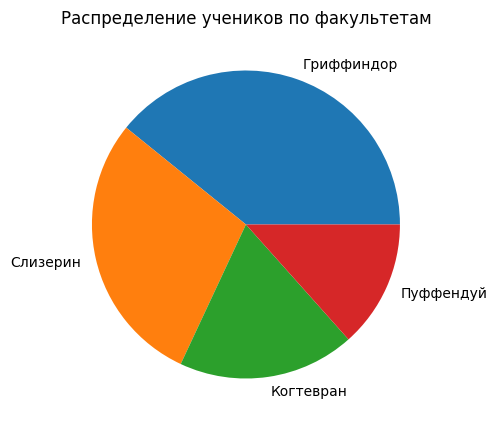

In [8]:
df_hogwarts_with_houses_quantity = df_hogwarts_with_houses[["House"]]

#Считаем, сколько учеников обучалось на каждом факультете
df_only_gryffindor = df_hogwarts_with_houses_quantity[(df_hogwarts_with_houses_quantity
                                                            ["House"]=="Gryffindor")].value_counts()
df_only_slytherin = df_hogwarts_with_houses_quantity[(df_hogwarts_with_houses_quantity
                                                           ["House"]=="Slytherin")].value_counts()
df_only_ravenclaw = df_hogwarts_with_houses_quantity[(df_hogwarts_with_houses_quantity
                                       ["House"]=="Ravenclaw")].value_counts()
df_only_hufflepuff = df_hogwarts_with_houses_quantity[(df_hogwarts_with_houses_quantity
                                                   ["House"]=="Hufflepuff")].value_counts()

frames = [df_only_gryffindor,df_only_slytherin,
          df_only_ravenclaw,df_only_hufflepuff]

df_hogwarts_with_houses_quantity = pd.concat(frames)
df_hogwarts_with_houses_quantity.rename("Quantity")

houses_labels = ['Гриффиндор', 'Слизерин', 'Когтевран', 'Пуффендуй']


houses_plot = df_hogwarts_with_houses_quantity.plot.pie(y='data', figsize=(5, 5), title="Распределение учеников по факультетам",
                                                        labels=houses_labels)

houses_plot

df_hogwarts_with_houses_quantity

Уже сейчас видно, что данных для машинного анализа мало, придется обратиться к экспертам - то есть магам, придумывать какие-то правила, искать логические закономерности.
Так как записей немного, скорость чтения данных будет очень быстрой - особенно если поделить данные на таблицы, стремясь к 3НФ.